<a href="https://colab.research.google.com/github/DarkSchneider/Exercises/blob/main/Traccia_progettoF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informazioni consegna
* Aggiungere i componenti del proprio gruppo in questo [form](https://forms.office.com/r/1WKBx4YgSH). 
* **I gruppi possono essere composti da massimo 3 persone. Nel caso si intenda fare il progetto da soli bisogna comunque aggiungere il proprio nome nel form.**
* Per la consegna è necessario caricare su Virtuale la relazione, il notebook Colab e le immagini generate.
* La consegna deve essere effettuata da un qualsiasi membro del gruppo e verrà automaticamente attribuita ai restanti componenti.
* Per i dettagli sulle tempistiche e le scadenze si faccia riferimento a Virtuale.

# Deblur Immagini
Il problema di deblur consiste nella ricostruzione di un immagine a partire da un dato acquisito mediante il seguente modello:

\begin{align*}
    b = A x + \eta
\end{align*}

dove $b$ rappresenta l'immagine corrotta, $x$ l'immagine originale che vogliamo ricostruire, $A$ l'operatore che applica il blur Gaussiano ed $\eta$ il rumore additivo con distribuzione Gaussiana di  media $\mathbb{0}$ e deviazione standard $\sigma$.

## Funzioni di blur
Le seguenti funzioni servono per applicare il blur di tipo gaussiano ad un'immagine.



In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, metrics
from scipy import signal
from numpy import fft

# Create a Gaussian kernel of size kernlen and standard deviation sigma
def gaussian_kernel(kernlen, sigma):
    x = np.linspace(- (kernlen // 2), kernlen // 2, kernlen)    
    # Unidimensional Gaussian kernel
    kern1d = np.exp(- 0.5 * (x**2 / sigma))
    # Bidimensional Gaussian kernel
    kern2d = np.outer(kern1d, kern1d)
    # Normalization
    return kern2d / kern2d.sum()

# Compute the FFT of the kernel 'K' of size 'd' padding with the zeros necessary
# to match the size of 'shape'
def psf_fft(K, d, shape):
    # Zero padding
    K_p = np.zeros(shape)
    K_p[:d, :d] = K

    # Shift
    p = d // 2
    K_pr = np.roll(np.roll(K_p, -p, 0), -p, 1)

    # Compute FFT
    K_otf = fft.fft2(K_pr)
    return K_otf

# Multiplication by A
def A(x, K):
  x = fft.fft2(x)
  return np.real(fft.ifft2(K * x))

# Multiplication by A transpose
def AT(x, K):
  x = fft.fft2(x)
  return np.real(fft.ifft2(np.conj(K) * x))

#funzione per trovare i pollici partendo da pixel
def pixel2inch(num,dpi):
  return num/dpi

## Generazione dataset
Generare un set di 8 immagini 512$\times$512 in formato ${\tt png}$ in scala dei grigi che contengano tra i 2 ed i 6 oggetti geometrici, di colore uniforme, su sfondo nero. 


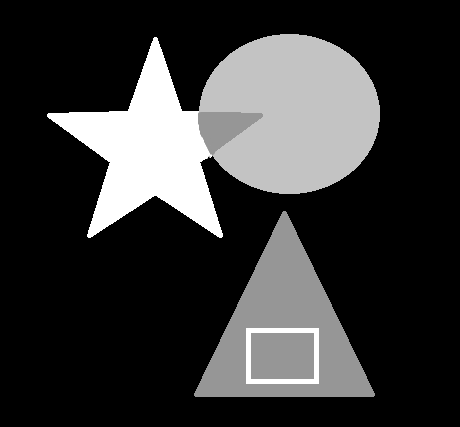


## 1) Generazione immagini corrotte
Degradare le immagini applicando, mediante le funzioni riportate nella cella precedente,  l'operatore di blur con parametri

+ $\sigma=0.5$ dimensione $5\times 5$
+ $\sigma=1$ dimensione $7\times 7$
+ $\sigma=1.3$ dimensione $9\times 9$

ed aggiungendo rumore gaussiano con deviazione standard $(0,0.05]$

PSNR immagine-0 con imblur1: 27.1309215515751
MSE immagine-0 con imblur1: 0.0019360111083022787


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PSNR immagine-1 con imblur1: 27.431861406195477
MSE immagine-1 con imblur1: 0.0018063997288059789


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PSNR immagine-2 con imblur1: 27.669510192346003
MSE immagine-2 con imblur1: 0.0017102081855637835


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PSNR immagine-3 con imblur1: 27.739830941406485
MSE immagine-3 con imblur1: 0.0016827395641009811


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PSNR immagine-4 con imblur1: 27.846783930335626
MSE immagine-4 con imblur1: 0.0016418051248348387


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PSNR immagine-5 con imblur1: 27.39491536231143
MSE immagine-5 con imblur1: 0.0018218325776175406


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PSNR immagine-6 con imblur1: 27.527805726265207
MSE immagine-6 con imblur1: 0.0017669303370998661


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PSNR immagine-7 con imblur1: 27.571132325455416
MSE immagine-7 con imblur1: 0.001749390514818328


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

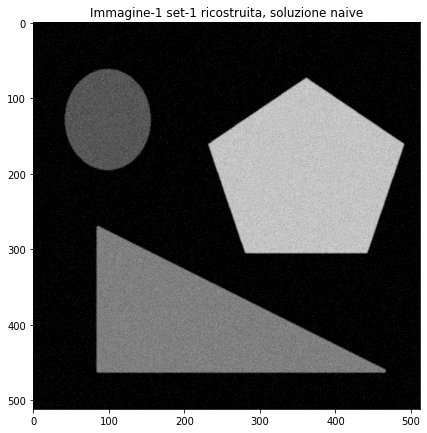

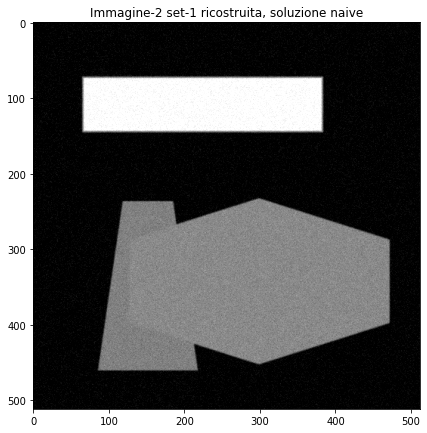

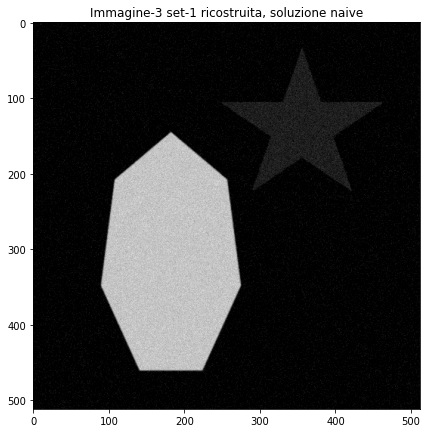

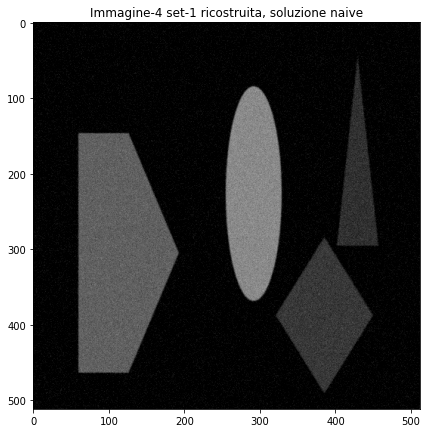

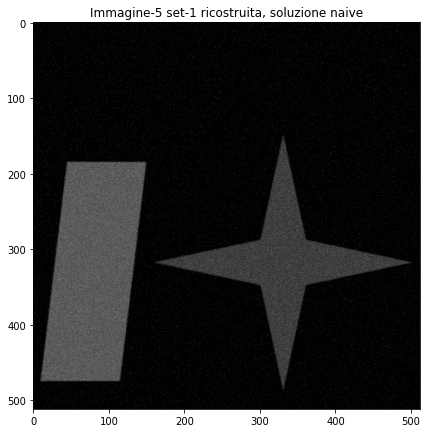

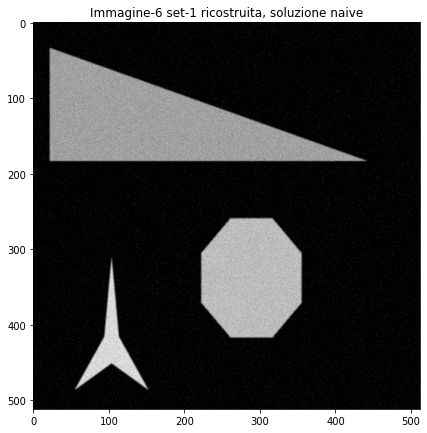

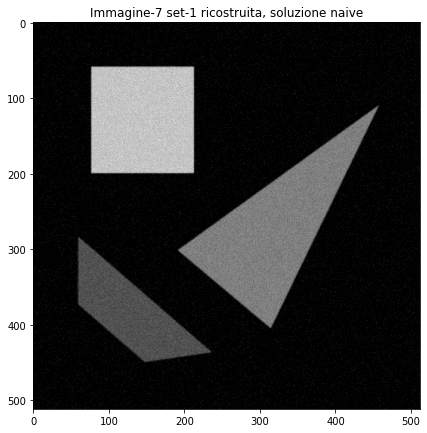

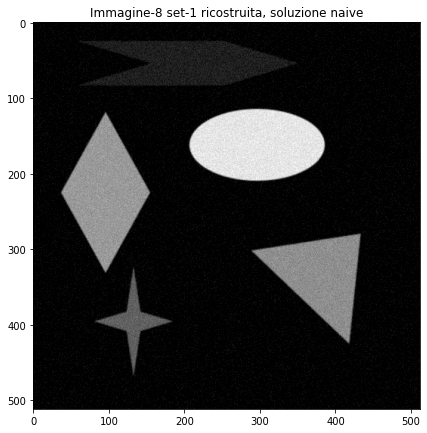

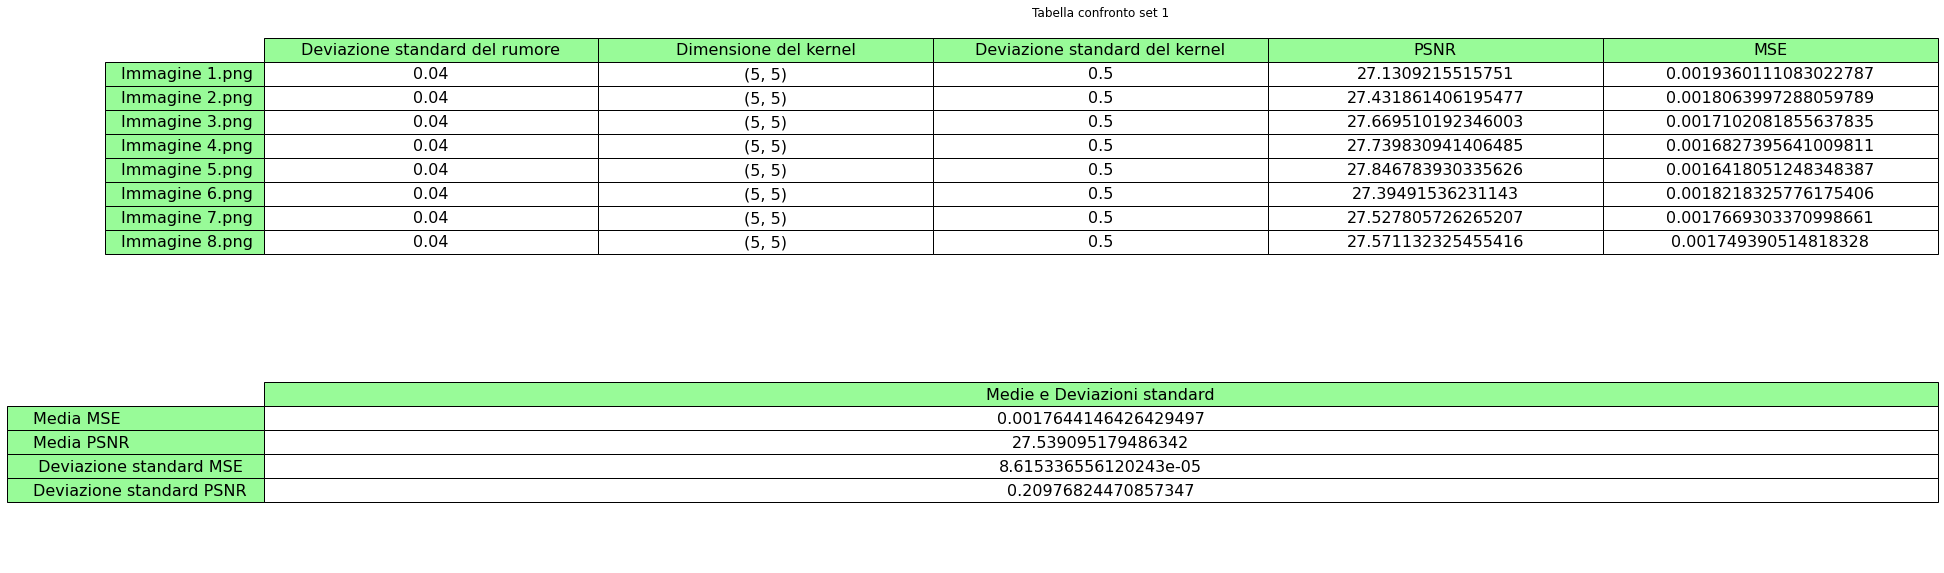

' roba per boxplot\nfig, (ax1, ax2) = plt.subplots(2, figsize= (10,10))\nax1.boxplot(MSE, 0, "")\nax2.boxplot(PSNR, 0, "")\nplt.show()\n'

In [10]:
from logging import PlaceHolder
import matplotlib.pyplot as plt
from skimage import color, io, metrics
import sys
from google.colab import files
import matplotlib


#lettura delle immagini e renderle in colormap bianco e nero
immagini=[]
for i in range(8):
  immagini.append(np.array(color.rgb2gray(plt.imread('{}.png'.format(i+1))), dtype=np.float64))

#aggiungere il blur
k1 = gaussian_kernel(5,0.5)
k2 = gaussian_kernel(7,1)
k3 = gaussian_kernel(9,1.3)

dim = immagini[i].shape

#filtro di blur
f1 = psf_fft(k1, 5, dim)
f2 = psf_fft(k2, 7, dim)
f3 = psf_fft(k3, 9, dim)


#rumore
sigma = 0.04

#moltiplicare tutto
imblur1 = []
imblur2 = []
imblur3 = []

data = []
data2 = []
MSE_corrotta = []
PSNR_corrotta = []
sum_MSE = 0
sum_PSNR = 0
for i in range(8):
    noise = np.random.normal(size=dim) * sigma
    imblur1.append(np.array(A(immagini[i], f1) + noise))
    '''
    imblur2.append(np.array(A(immagini[i], f2) + noise))
    imblur3.append(np.array(A(immagini[i], f3) + noise))
    '''
    ###da cambiare <<-------------------------------------------------
    x = imblur1[i]
    placeholder = "1"

    #calcolare psnr e mse tra (immagini, imblur)
    PSNR_corrotta.append(metrics.peak_signal_noise_ratio(immagini[i], x))
    MSE_corrotta.append(metrics.mean_squared_error(immagini[i], x))
    print('PSNR immagine-{} con imblur1: {}'.format(i,PSNR_corrotta[i]))
    print('MSE immagine-{} con imblur1: {}'.format(i,MSE_corrotta[i]))
    data.append([sigma, k1.shape, 0.5, PSNR_corrotta[i], MSE_corrotta[i]])

    #salvare le immagini
    plt.figure(figsize=(pixel2inch(512,72),pixel2inch(512,72))) #72dpi
    ax = plt.subplot()
    ax.imshow(x, cmap='gray', vmin=0, vmax=1)
    plt.title('Immagine-' + str(i+1) + ' set-{} ricostruita, soluzione naive'.format(str(placeholder)))
    plt.imsave('Immagine-' + str(i+1) + ' set-{} ricostruita, soluzione naive.png'.format(str(placeholder)), x, cmap=plt.cm.gray, vmin=0, vmax=1)
    files.download('Immagine-' + str(i+1) + ' set-{} ricostruita, soluzione naive.png'.format(str(placeholder)))

    sum_MSE = MSE_corrotta[i] + sum_MSE
    sum_PSNR = PSNR_corrotta[i] + sum_PSNR

media_MSE_corrotta = sum_MSE / 8
media_PSNR_corrotta = sum_PSNR / 8
dev_MSE_corrotta = np.std(MSE_corrotta)
dev_PSNR_corrotta = np.std(PSNR_corrotta)
data2.append([media_MSE_corrotta])
data2.append([media_PSNR_corrotta])
data2.append([dev_MSE_corrotta])
data2.append([dev_PSNR_corrotta])
headers=["Deviazione standard del rumore", "Dimensione del kernel", "Deviazione standard del kernel", "PSNR", "MSE"]


fig, (ax, ax2) = plt.subplots(2,figsize=(30,10))
ax.set_axis_off()
table = ax.table(
    cellText = data,
    colLabels = headers,
    rowLabels = ["Immagine 1.png", "Immagine 2.png","Immagine 3.png","Immagine 4.png","Immagine 5.png","Immagine 6.png","Immagine 7.png","Immagine 8.png"],
    rowColours =["palegreen"] * 10,  
    colColours =["palegreen"] * 10, 
    cellLoc = "center",
    loc="center")
table.scale(1,2)
ax.set_axis_off()
table.set_fontsize(16)
ax.set_title("Tabella confronto set 1")

ax2.set_axis_off()
table2 = ax2.table(
    cellText = data2,
    colLabels = ["Medie e Deviazioni standard"],
    rowLabels = ["Media MSE", "Media PSNR", " Deviazione standard MSE", "Deviazione standard PSNR"],
    rowColours =["palegreen"] * 10,  
    colColours =["palegreen"] * 10, 
    cellLoc = "center",
    loc = "center")
table2.scale(1,2)
ax2.set_axis_off()
table2.set_fontsize(16)

plt.show()
''' roba per boxplot
fig, (ax1, ax2) = plt.subplots(2, figsize= (10,10))
ax1.boxplot(MSE, 0, "")
ax2.boxplot(PSNR, 0, "")
plt.show()
'''

## 2) Soluzione naive

Una possibile ricostruzione dell'immagine originale $x$ partendo dall'immagine corrotta $b$ è la soluzione naive data dal minimo del seguente problema di ottimizzazione:
\begin{align}
  x^* = \arg\min_x \frac{1}{2} ||Ax - b||_2^2
\end{align}

La funzione $f$ da minimizzare è data dalla formula
  $f(x) = \frac{1}{2} ||Ax - b||_2^2 $, il cui gradiente $\nabla f$ è dato da
$\nabla f(x) = A^TAx - A^Tb  $.

Utilizzando il metodo del gradiente coniugato implementato dalla funzione `minimize` calcolare la soluzione naive. 

         Current function value: 2.307582
         Iterations: 30
         Function evaluations: 64
         Gradient evaluations: 64
     fun: 2.307582110960601
     jac: array([-6.33169077e-06, -8.58586363e-05, -4.76775118e-04, ...,
       -1.98235539e-04, -8.91346015e-05,  8.99060350e-05])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 64
     nit: 30
    njev: 64
  status: 1
 success: False
       x: array([-0.00440629, -0.46181138,  0.27377639, ...,  0.16925252,
       -0.16462519,  0.07465676])
PSNR immagine-0 con imblur1: 10.075212374149254
MSE immagine-0 con imblur1: 0.09828308104596341


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Current function value: 2.298428
         Iterations: 30
         Function evaluations: 64
         Gradient evaluations: 64
     fun: 2.2984275860033994
     jac: array([-4.29208566e-04,  5.03392889e-04, -2.85326723e-04, ...,
       -5.66683798e-05,  2.25180988e-05, -1.24528632e-04])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 64
     nit: 30
    njev: 64
  status: 1
 success: False
       x: array([-0.07134919, -0.25677483,  0.10369742, ..., -0.21446517,
        0.29317221, -0.10330886])
PSNR immagine-1 con imblur1: 10.055475423939681
MSE immagine-1 con imblur1: 0.09873075488709791


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Current function value: 2.329395
         Iterations: 30
         Function evaluations: 64
         Gradient evaluations: 64
     fun: 2.3293949053055556
     jac: array([ 9.17991489e-04, -4.11584589e-04, -2.47655514e-04, ...,
        1.61710598e-04, -9.34707264e-05,  9.76338676e-05])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 64
     nit: 30
    njev: 64
  status: 1
 success: False
       x: array([ 0.1722041 , -0.0077445 , -0.39220692, ..., -0.19781191,
       -0.07124082,  0.21701518])
PSNR immagine-2 con imblur1: 10.010583249446723
MSE immagine-2 con imblur1: 0.09975660835484236


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Current function value: 2.400582
         Iterations: 30
         Function evaluations: 62
         Gradient evaluations: 62
     fun: 2.4005818142218933
     jac: array([-3.63205840e-04,  6.02930310e-04, -4.45125062e-05, ...,
        7.59884061e-04,  4.76751041e-04,  3.89891663e-04])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 62
     nit: 30
    njev: 62
  status: 1
 success: False
       x: array([ 0.13769946, -0.06555381,  0.21671517, ..., -0.12464581,
        0.05050676,  0.48402336])
PSNR immagine-3 con imblur1: 10.055364010769708
MSE immagine-3 con imblur1: 0.09873328774163105


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Current function value: 2.266416
         Iterations: 30
         Function evaluations: 63
         Gradient evaluations: 63
     fun: 2.2664163841191374
     jac: array([-0.00022738, -0.00055343,  0.00016592, ..., -0.0005083 ,
       -0.00124485,  0.00010204])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 63
     nit: 30
    njev: 63
  status: 1
 success: False
       x: array([ 0.10677669, -0.45559447,  0.09052466, ..., -0.25607512,
        0.19813511, -0.27566436])
PSNR immagine-4 con imblur1: 10.018580063363334
MSE immagine-4 con imblur1: 0.09957309208437223


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Current function value: 2.935895
         Iterations: 30
         Function evaluations: 64
         Gradient evaluations: 64
     fun: 2.935894930320808
     jac: array([-0.00026027,  0.00044333, -0.00020647, ...,  0.00054863,
        0.00010565, -0.00025676])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 64
     nit: 30
    njev: 64
  status: 1
 success: False
       x: array([ 0.17536108,  0.0302962 ,  0.09864302, ...,  0.15743809,
       -0.23929691,  0.2101635 ])
PSNR immagine-5 con imblur1: 10.291922179287745
MSE immagine-5 con imblur1: 0.09349917569447072


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Current function value: 2.422215
         Iterations: 30
         Function evaluations: 62
         Gradient evaluations: 62
     fun: 2.4222151013467212
     jac: array([-4.23288440e-04, -8.46236535e-05,  8.28012809e-06, ...,
       -6.78118006e-04,  1.62065758e-03,  6.85533984e-04])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 62
     nit: 30
    njev: 62
  status: 1
 success: False
       x: array([-0.24456456,  0.15566329, -0.27186792, ...,  0.02355386,
       -0.32090286, -0.09125609])
PSNR immagine-6 con imblur1: 10.139569373872266
MSE immagine-6 con imblur1: 0.09683738709319527


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Current function value: 2.444425
         Iterations: 30
         Function evaluations: 62
         Gradient evaluations: 62
     fun: 2.444424942861099
     jac: array([0.00041257, 0.00092095, 0.00016089, ..., 0.00047259, 0.00016804,
       0.0003346 ])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 62
     nit: 30
    njev: 62
  status: 1
 success: False
       x: array([-0.31404179,  0.16042063,  0.02698725, ..., -0.62133944,
        0.36242249, -0.22918254])
PSNR immagine-7 con imblur1: 10.151485902551116
MSE immagine-7 con imblur1: 0.09657204092305893


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

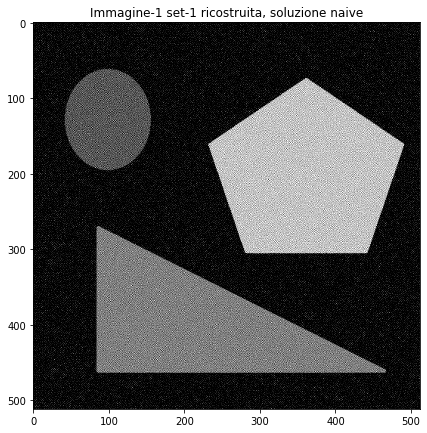

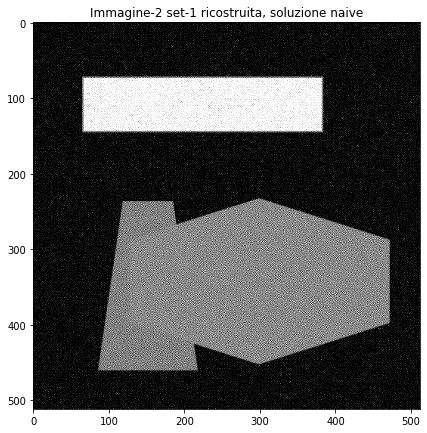

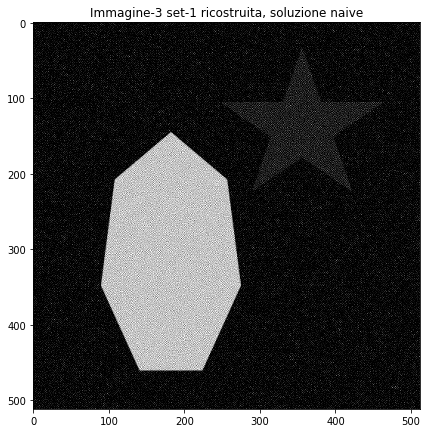

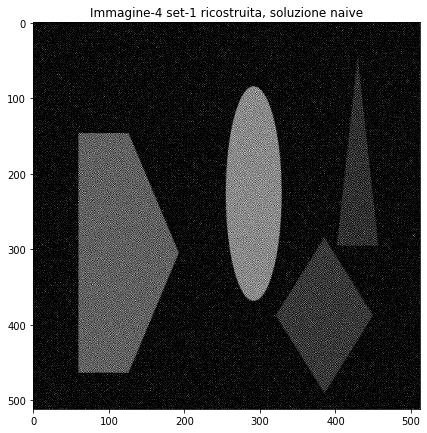

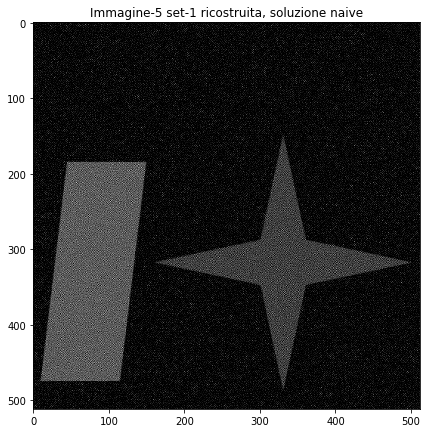

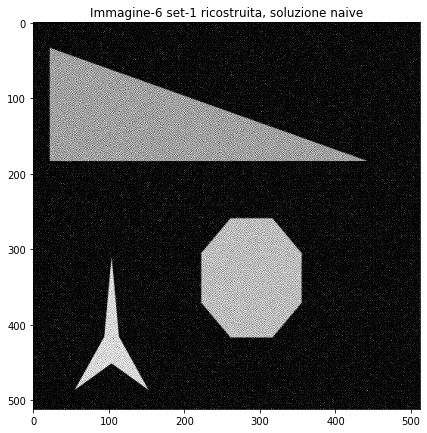

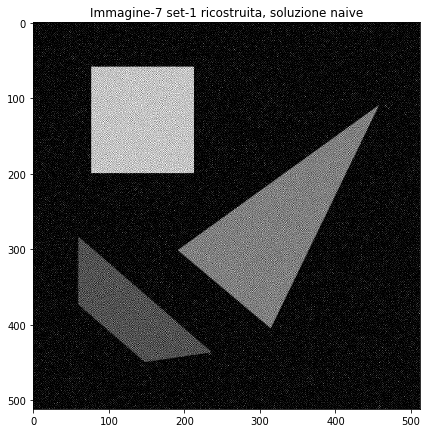

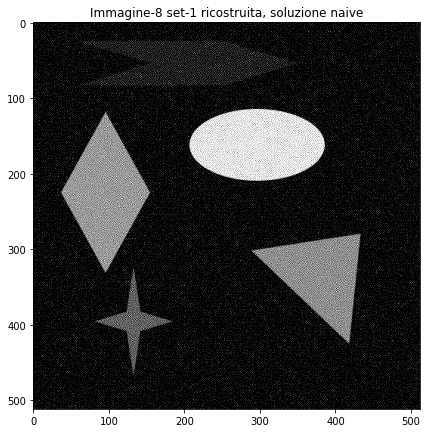

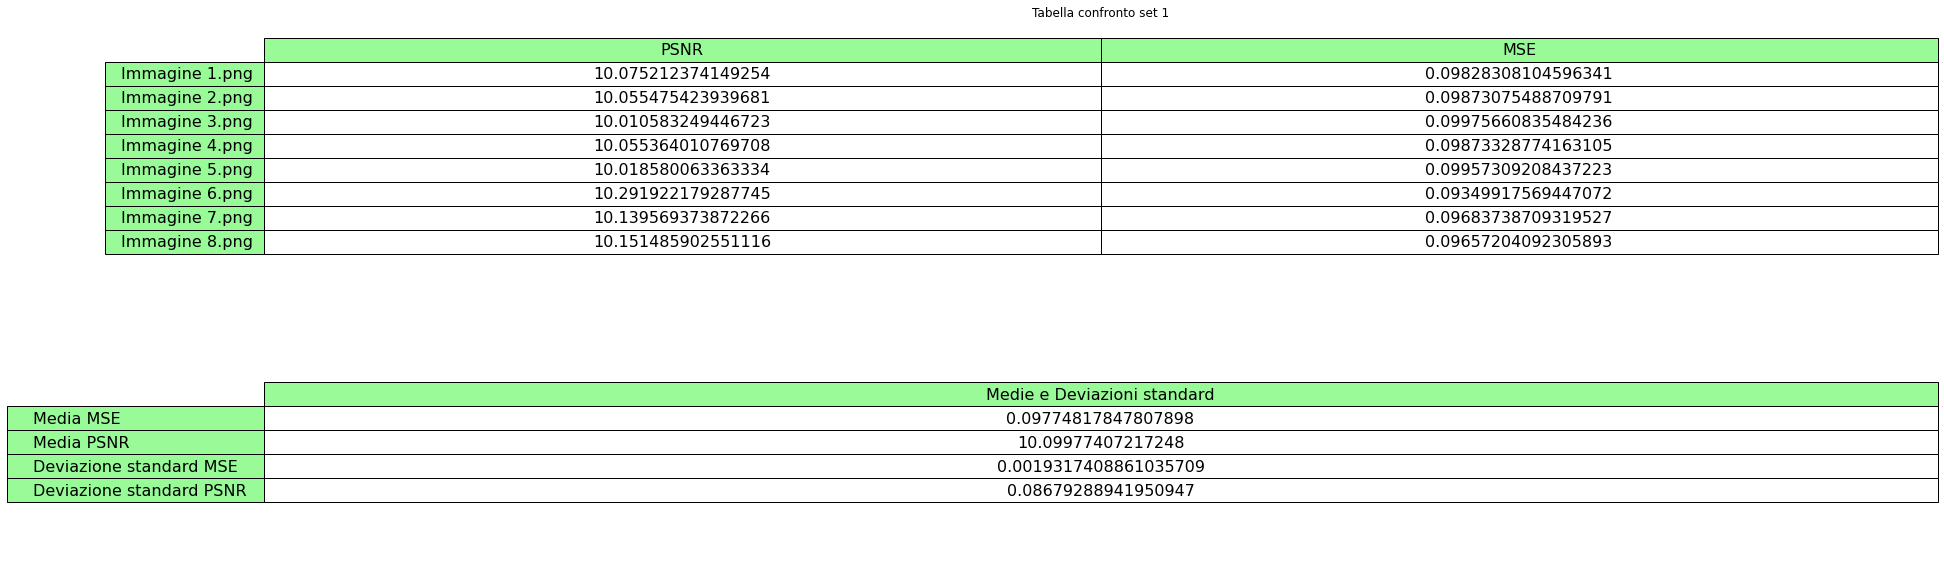

In [11]:
from scipy.optimize import minimize
#filtro di blur attualmente utilizzato, cambiare questo per cambiare la A a seconda del blur che si vuole usare
blur = f1

if np.array_equal(blur, f3):
  set_number = 3
  
elif np.array_equal(blur, f2):
  set_number = 2

elif np.array_equal(blur, f1):
  set_number = 1
  
else:
  set_number = 99

#ignoro il rumore

def f(x):
  x_matrix = x.reshape((immagini[0].shape[0], immagini[0].shape[1]))
  #print(0.5*np.linalg.norm(A(x_matrix,blur) - b))
  r = 0.5*(np.linalg.norm(A(x_matrix, blur) - b)**2)
  return np.sum(r)

def grad_f(x):
  x_matrix = x.reshape(immagini[0].shape[0], immagini[0].shape[0])  #formo la matrice
  r = AT(A(x_matrix,blur) - b, blur)
  r = r.reshape(r.shape[0]**2)
  return r

data_naive = []
data2 = []
MSE_naive = []
PSNR_naive = []
sum_MSE = 0
sum_PSNR = 0

for i in range(8):
  b=imblur1[i]
  x0 = np.zeros(immagini[0].shape[0]**2)

  res = minimize(f, x0, method='CG', jac=grad_f, options={'disp':True, 'maxiter':30})

  print(res)

  x = res.x.reshape((512,512))
  
  PSNR_naive.append(metrics.peak_signal_noise_ratio(immagini[i], x))
  MSE_naive.append(metrics.mean_squared_error(immagini[i], x))
  print('PSNR immagine-{} con imblur{}: {}'.format(i, set_number, PSNR_naive[i]))
  print('MSE immagine-{} con imblur{}: {}'.format(i, set_number, MSE_naive[i]))
  data_naive.append([PSNR_naive[i], MSE_naive[i]])

  sum_MSE = MSE_naive[i] + sum_MSE
  sum_PSNR = PSNR_naive[i] + sum_PSNR

  #stampa e salva immagini
  plt.figure(figsize=(pixel2inch(512,72),pixel2inch(512,72))) #72dpi
  ax = plt.subplot()
  ax.imshow(x, cmap='gray', vmin=0, vmax=1)
  plt.title('Immagine-' + str(i+1) + ' set-{} ricostruita, soluzione naive'.format(set_number))
  plt.imsave('Immagine-' + str(i+1) + ' set-{} ricostruita, soluzione naive.png'.format(set_number),x, cmap=plt.cm.gray, vmin=0, vmax=1)
  files.download('Immagine-' + str(i+1) + ' set-{} ricostruita, soluzione naive.png'.format(set_number))

media_MSE_naive = sum_MSE / 8
media_PSNR_naive = sum_PSNR / 8
dev_MSE_naive = np.std(MSE_naive)
dev_PSNR_naive = np.std(PSNR_naive)
data2.append([media_MSE_naive])
data2.append([media_PSNR_naive])
data2.append([dev_MSE_naive])
data2.append([dev_PSNR_naive])
headers=["PSNR", "MSE"]


fig, (ax, ax2) = plt.subplots(2,figsize=(30,10))
ax.set_axis_off()
table = ax.table(
    cellText = data_naive,
    colLabels = headers,
    rowLabels = ["Immagine 1.png", "Immagine 2.png","Immagine 3.png","Immagine 4.png","Immagine 5.png","Immagine 6.png","Immagine 7.png","Immagine 8.png"],
    rowColours =["palegreen"] * 10,  
    colColours =["palegreen"] * 10, 
    cellLoc = "center",
    loc="center")
table.scale(1,2)
ax.set_axis_off()
table.set_fontsize(16)
ax.set_title("Tabella confronto set 1")

ax2.set_axis_off()
table2 = ax2.table(
    cellText = data2,
    colLabels = ["Medie e Deviazioni standard"],
    rowLabels = ["Media MSE", "Media PSNR", "Deviazione standard MSE", "Deviazione standard PSNR"],
    rowColours =["palegreen"] * 10,  
    colColours =["palegreen"] * 10, 
    cellLoc = "center",
    loc = "center")
table2.scale(1,2)
ax2.set_axis_off()
table2.set_fontsize(16)

plt.show()

## 3) Regolarizzazione
Per ridurre gli effetti del rumore nella ricostruzione è necessario introdurre un termine di regolarizzazione di Tikhonov. Si considera quindi il seguente problema di ottimizzazione.
\begin{align*}
  x^* = \arg\min_x \frac{1}{2} ||Ax - b||_2^2 + \frac{\lambda}{2} ||x||_2^2
\end{align*}

La funzione $f$ da minimizzare diventa
$f(x) = \frac{1}{2} ||Ax - b||_2^2 + \frac{\lambda}{2} ||x||_2^2$
il cui gradiente $\nabla f$ è dato da
$\nabla f(x) = A^TAx - A^Tb + λx$.

Utilizzando il metodo del gradiente coniugato implementato dalla funzione `minimize` ed il metodo del gradiente implementato a lezione, calcolare la soluzione del precendente problema di minimo regolarizzato per differenti valori di $\lambda$. 

In [12]:
#backtrackng
def next_step(x,grad): # backtracking procedure for the choice of the steplength
    alpha=1.1 
    rho = 0.5 #parametro con cui divido alpha dopo ogni iterazione
    c1 = 0.25 #parametro fisso
    p=-grad
    j=0
    jmax=10
    while (((f(x+alpha*p)).all() > (f(x)+c1*alpha*grad.T@p).all()) and j<jmax ): #condizioni di wolfe per la ricerca in linea inesatta
      alpha= rho*alpha
      j+=1
    if (j>jmax):
      return -1
    else:
      #print('alpha=',alpha)
      return alpha

In [13]:
#altra iterazione per gradient_minimize
def grad_minimize(x0, b, step, MAXITERATION, ABSOLUTE_STOP):
  #declare x_k and gradient_k vectors

  norm_grad_list=np.zeros((1,MAXITERATION+1))
  function_eval_list=np.zeros((1,MAXITERATION+1))
  error_list=np.zeros((1,MAXITERATION+1))
  
  #initialize first values
  x_last = x0.reshape((immagini[0].shape[0], immagini[0].shape[1]))


  k=0

  function_eval_list[:,k]=f(x_last)
  error_list[:,k]=np.linalg.norm(x_last-b)
  norm_grad_list[:,k]=np.linalg.norm(grad_f(x_last))

  while (np.linalg.norm(grad_f(x_last))>ABSOLUTE_STOP and k < MAXITERATION ):
    k=k+1
    grad = grad_f(x_last).reshape(immagini[0].shape[0], immagini[0].shape[1]) #direction is given by gradient of the last iteration

    # backtracking step
    step = next_step(x_last,grad)
    # Fixed step
    #step = 0.1
    
    if(step==-1):
      print('non convergente')
      return (k) #no convergence (iteration)

    x_last=x_last-step*grad

    function_eval_list[:,k]=f(x_last)
    error_list[:,k]=np.linalg.norm(x_last-b)
    norm_grad_list[:,k]=np.linalg.norm(grad_f(x_last))

  function_eval_list = function_eval_list[:,:k+1]
  error_list = error_list[:,:k+1]
  norm_grad_list = norm_grad_list[:,:k+1]
  
  print('iterations=',k)
  #print('last guess: x=(%f)'%(x[0,k]))

  return (x_last,norm_grad_list, function_eval_list, error_list, k)


In [14]:
lam=0.8

def f(x):
  if x.shape != immagini[0].shape:
    x_matrix = x.reshape((immagini[0].shape[0], immagini[0].shape[1]))
  else:
    x_matrix = x
  r = 0.5*(np.linalg.norm(A(x_matrix, blur) - b)**2) + ((lam/2)*np.linalg.norm(x_matrix)**2)
  return np.sum(r)

def grad_f(x):
  if x.shape != immagini[0].shape:
    x_matrix = x.reshape(immagini[0].shape[0], immagini[0].shape[0])  #formo la matrice
  else:
    x_matrix = x
  r = AT(A(x_matrix,blur), blur) - AT(b, blur) + lam*x_matrix
  r = r.reshape(r.shape[0]**2)
  return r

Optimization terminated successfully.
         Current function value: 7986.597061
         Iterations: 11
         Function evaluations: 18
         Gradient evaluations: 18
     fun: 7986.597061128112
     jac: array([ 3.08128477e-07,  7.66716612e-08, -3.00211557e-08, ...,
       -6.77575288e-08, -2.92797135e-07,  1.95112174e-07])
 message: 'Optimization terminated successfully.'
    nfev: 18
     nit: 11
    njev: 18
  status: 0
 success: True
       x: array([ 0.01574639, -0.01870856, -0.02026819, ..., -0.00987729,
       -0.01924741,  0.01736188])
PSNR immagine-0 con imblur1: 15.63481417997528
MSE immagine-0 con imblur1: 0.02732238344681184


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 9470.945271
         Iterations: 10
         Function evaluations: 18
         Gradient evaluations: 18
     fun: 9470.945270692215
     jac: array([-4.94321967e-07,  6.69281648e-07,  7.48062958e-08, ...,
        7.97222387e-09,  7.66280729e-07, -1.29176484e-07])
 message: 'Optimization terminated successfully.'
    nfev: 18
     nit: 10
    njev: 18
  status: 0
 success: True
       x: array([ 0.00953247,  0.00028105, -0.00149065, ...,  0.0039577 ,
       -0.01313757, -0.00298097])
PSNR immagine-1 con imblur1: 14.92899187839111
MSE immagine-1 con imblur1: 0.03214406607682699


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 5866.778130
         Iterations: 11
         Function evaluations: 21
         Gradient evaluations: 21
     fun: 5866.778129742253
     jac: array([-6.84715634e-08, -2.07357187e-07,  1.97872616e-07, ...,
       -1.40208580e-07,  2.22693262e-07,  7.19728009e-08])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 11
    njev: 21
  status: 0
 success: True
       x: array([-0.00876576, -0.01370838, -0.01170538, ..., -0.00439448,
       -0.00882182, -0.00418783])
PSNR immagine-2 con imblur1: 17.050172624989514
MSE immagine-2 con imblur1: 0.019723443370788386


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 2412.214540
         Iterations: 8
         Function evaluations: 20
         Gradient evaluations: 20
     fun: 2412.2145395127045
     jac: array([ 1.09228252e-06,  1.48186457e-06, -1.85822022e-07, ...,
        8.05802536e-07,  5.30094534e-07, -1.19741263e-06])
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 8
    njev: 20
  status: 0
 success: True
       x: array([ 0.01604013,  0.00125705, -0.01259052, ..., -0.03875667,
        0.0110222 ,  0.0475552 ])
PSNR immagine-3 con imblur1: 21.00945413978981
MSE immagine-3 con imblur1: 0.007926009454072553


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 1308.725858
         Iterations: 8
         Function evaluations: 17
         Gradient evaluations: 17
     fun: 1308.7258583019102
     jac: array([-3.76622943e-07,  1.04412420e-06,  1.50550581e-06, ...,
       -4.71503491e-07, -7.85708292e-07, -9.68081588e-07])
 message: 'Optimization terminated successfully.'
    nfev: 17
     nit: 8
    njev: 17
  status: 0
 success: True
       x: array([ 0.00967838,  0.00018228,  0.00567888, ..., -0.00256197,
       -0.00905071,  0.00156322])
PSNR immagine-4 con imblur1: 23.859741127442653
MSE immagine-4 con imblur1: 0.004111742294868369


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 5526.070525
         Iterations: 11
         Function evaluations: 25
         Gradient evaluations: 25
     fun: 5526.07052451952
     jac: array([-8.38617873e-08, -2.12402777e-07, -1.88857214e-07, ...,
        4.69848454e-08,  8.29239438e-08,  1.86567367e-08])
 message: 'Optimization terminated successfully.'
    nfev: 25
     nit: 11
    njev: 25
  status: 0
 success: True
       x: array([ 0.00251878, -0.00949933, -0.01460753, ...,  0.00041014,
       -0.0060441 , -0.00765852])
PSNR immagine-5 con imblur1: 17.242016560615784
MSE immagine-5 con imblur1: 0.018871149011139895


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 4344.666725
         Iterations: 10
         Function evaluations: 20
         Gradient evaluations: 20
     fun: 4344.666725093144
     jac: array([ 3.00108437e-07,  1.07661715e-07, -3.27564208e-07, ...,
       -2.46023930e-07, -1.00885231e-07,  5.55575811e-08])
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 10
    njev: 20
  status: 0
 success: True
       x: array([-0.00205994,  0.00061155, -0.01710941, ..., -0.01001491,
       -0.0137625 ,  0.00094184])
PSNR immagine-6 con imblur1: 18.328458689263364
MSE immagine-6 con imblur1: 0.014694476919708734


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 4363.903738
         Iterations: 9
         Function evaluations: 18
         Gradient evaluations: 18
     fun: 4363.903737882652
     jac: array([-7.99748081e-07, -5.96412102e-07,  8.05947719e-08, ...,
        4.79657585e-07, -2.80121821e-08, -4.59217728e-07])
 message: 'Optimization terminated successfully.'
    nfev: 18
     nit: 9
    njev: 18
  status: 0
 success: True
       x: array([-0.00214157, -0.00747371, -0.0082302 , ..., -0.02628307,
        0.00384842,  0.00455004])
PSNR immagine-7 con imblur1: 18.31614525602744
MSE immagine-7 con imblur1: 0.01473619888878627


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

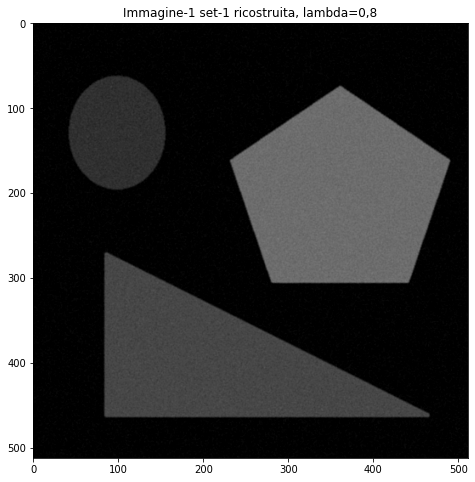

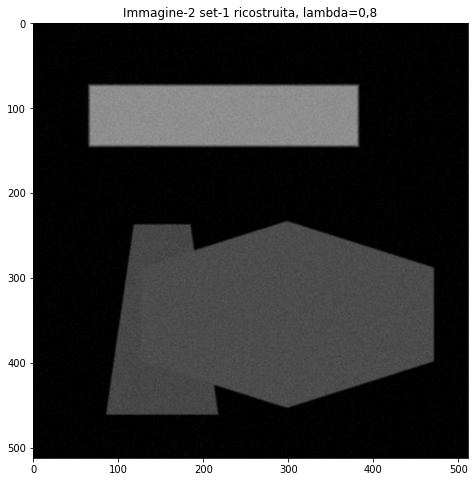

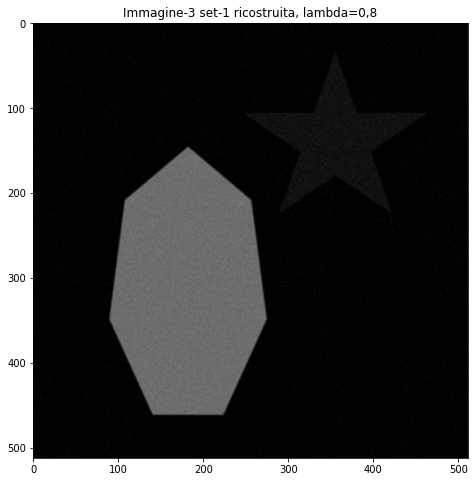

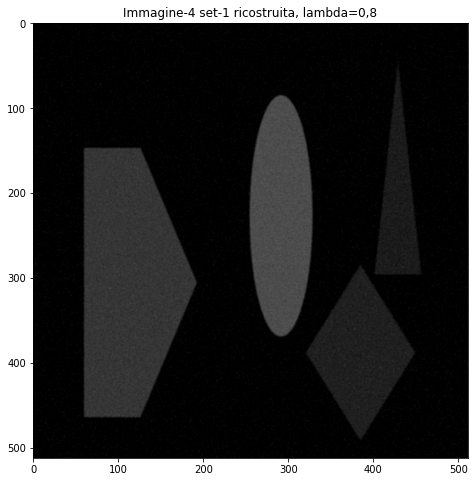

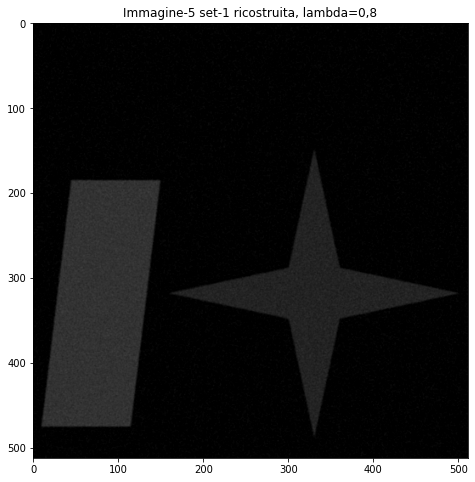

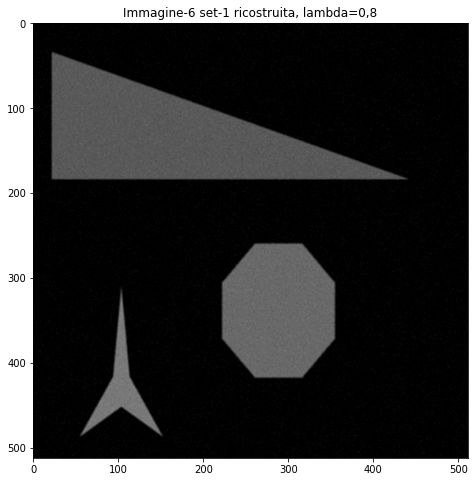

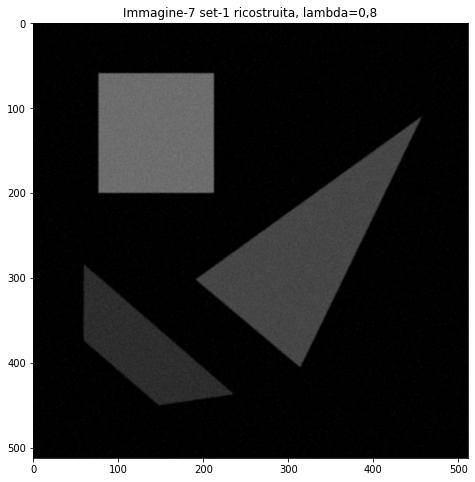

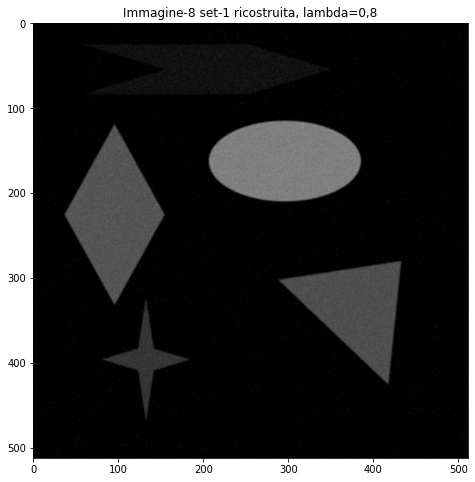

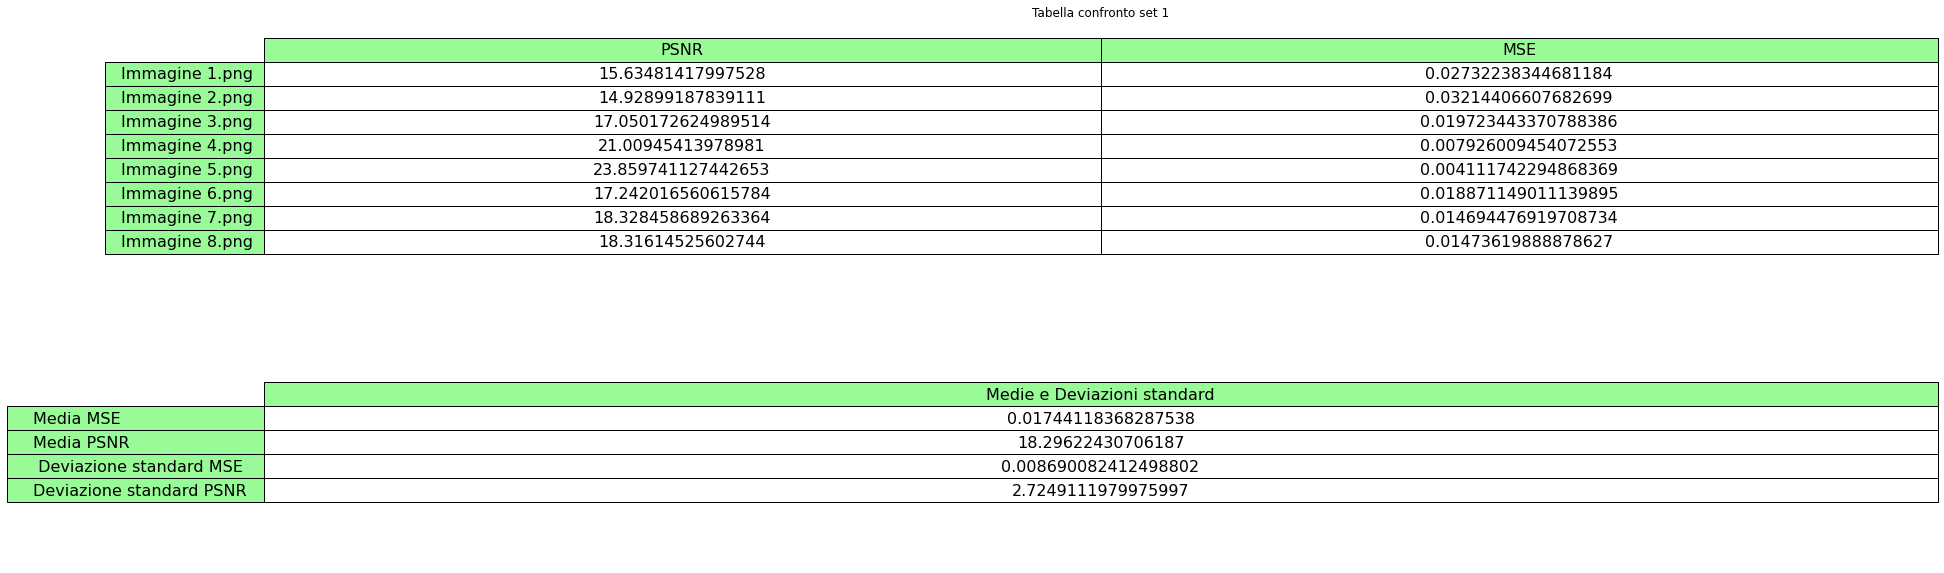

iterations= 100
[[ 0.01567484 -0.01876792 -0.02031514 ... -0.00707408 -0.0117486
   0.01068647]
 [ 0.01872766  0.01777929  0.00309231 ...  0.00124731 -0.00551546
   0.00277559]
 [ 0.02472605  0.04928635  0.02392064 ... -0.01087125  0.00218431
   0.0180472 ]
 ...
 [ 0.01068301 -0.00844644  0.00472937 ...  0.00989827  0.00553941
   0.00338801]
 [ 0.00994751 -0.01115539 -0.00499414 ... -0.00402937 -0.02081702
  -0.00404252]
 [ 0.03153425 -0.00736969 -0.01030885 ... -0.00997832 -0.01933864
   0.01728075]]
PSNR immagine-0 con imblur1: 14.435113144152611
MSE immagine-0 con imblur1: 0.03601543673854518


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

iterations= 100
[[ 0.00963435  0.0003812  -0.00139086 ...  0.00625258 -0.01829239
  -0.01018601]
 [ 0.01574     0.01069583  0.00720025 ...  0.0010534   0.00618581
   0.00408446]
 [-0.00429091 -0.01456099 -0.02681355 ...  0.02363066  0.02519377
   0.0191537 ]
 ...
 [-0.00347878 -0.00921178 -0.00820925 ... -0.02634384 -0.00343756
   0.00939771]
 [-0.00993457 -0.01592017  0.01234264 ... -0.00979681 -0.01320297
   0.00150039]
 [ 0.00530101  0.0015788   0.01076767 ...  0.00405348 -0.01304156
  -0.00288346]]
PSNR immagine-1 con imblur1: 13.73220209249093
MSE immagine-1 con imblur1: 0.04234282121074044


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

iterations= 100
[[-0.00864881 -0.01359571 -0.01159817 ... -0.01778202 -0.00972875
   0.00135027]
 [-0.01085962  0.00796442 -0.00576041 ... -0.02432434 -0.02167629
  -0.02500552]
 [ 0.00831695 -0.01083447 -0.01081407 ... -0.01938292 -0.01386739
  -0.01691197]
 ...
 [-0.01082991  0.01254335 -0.00652437 ...  0.00187789 -0.00184235
  -0.01070895]
 [-0.01571156 -0.00156136  0.01275879 ...  0.00676702 -0.01006017
  -0.022742  ]
 [-0.01787666 -0.03078145 -0.00577852 ... -0.00426302 -0.0086934
  -0.00406236]]
PSNR immagine-2 con imblur1: 15.830441396421946
MSE immagine-2 con imblur1: 0.02611895880133994


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

iterations= 100
[[ 1.60226403e-02  1.24510239e-03 -1.25951280e-02 ... -3.07082793e-02
   1.51898433e-02  2.84410159e-02]
 [-2.23337109e-05 -3.58083239e-03 -1.11381689e-02 ... -8.81808691e-03
   1.72260847e-02  2.41263206e-02]
 [-7.02778357e-03  3.48423391e-03 -1.03286973e-02 ... -2.28094857e-02
  -6.05549619e-03  2.25241335e-02]
 ...
 [-3.33585782e-03 -1.19141386e-02  5.67651154e-04 ...  4.01193773e-03
   1.35846342e-02  2.12911376e-02]
 [ 2.42270689e-02  9.51078401e-03  6.58049993e-03 ... -2.16779986e-02
  -2.42984559e-03  2.55967357e-02]
 [ 3.82209629e-02  1.32718395e-02 -8.72802340e-03 ... -3.87943806e-02
   1.09913762e-02  4.75326181e-02]]
PSNR immagine-3 con imblur1: 19.87825846122042
MSE immagine-3 con imblur1: 0.010284286195665886


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

iterations= 100
[[ 0.00974419  0.00025136  0.005752   ... -0.02150926 -0.02402642
   0.01238347]
 [ 0.00024386  0.01665437  0.0021769  ... -0.00719558 -0.00814268
  -0.00883939]
 [-0.00936095  0.01307903 -0.01256759 ...  0.0177597   0.00248302
  -0.0244809 ]
 ...
 [-0.0028534  -0.00671593 -0.00729886 ...  0.00305182  0.00809849
   0.01039986]
 [ 0.00271645  0.00206745 -0.01764334 ...  0.01060069  0.01288965
   0.01128244]
 [ 0.00325529  0.01103757  0.01009883 ... -0.00252306 -0.00900734
   0.00161122]]
PSNR immagine-4 con imblur1: 22.748858177615784
MSE immagine-4 con imblur1: 0.005310240397037017


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

iterations= 100
[[ 0.00245859 -0.00955138 -0.01465056 ... -0.00604216  0.00370746
   0.00069564]
 [ 0.01314766  0.0026557  -0.01009341 ...  0.00117959  0.01357969
   0.02045688]
 [ 0.01370383  0.00681008 -0.01191552 ... -0.016326    0.01541479
   0.0192317 ]
 ...
 [ 0.00793898  0.00951814 -0.00718481 ...  0.02017727 -0.0018815
  -0.00412441]
 [ 0.00606076  0.00755077  0.01425747 ...  0.01708818 -0.00681196
  -0.00921049]
 [-0.00960829 -0.02492192 -0.01141325 ...  0.00033709 -0.00611298
  -0.00772178]]
PSNR immagine-5 con imblur1: 16.12429922369907
MSE immagine-5 con imblur1: 0.024410129173930973


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

iterations= 100
[[-0.00205306  0.00061669 -0.01710588 ... -0.00013567 -0.00188243
   0.00803229]
 [ 0.00028907  0.00342919 -0.00740448 ...  0.01436251  0.00500432
  -0.00425334]
 [ 0.00599622 -0.00129659 -0.00094019 ...  0.00674225  0.01872598
  -0.00042438]
 ...
 [-0.02071919  0.00831584  0.03332002 ... -0.00408197 -0.00896035
   0.00988417]
 [-0.02121347 -0.01735144  0.00601077 ...  0.01498553  0.01295356
   0.01520617]
 [-0.0069338  -0.00587097 -0.01563738 ... -0.01000944 -0.01375971
   0.00094208]]
PSNR immagine-6 con imblur1: 17.17880340801035
MSE immagine-6 con imblur1: 0.019147834239849244


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

iterations= 100
[[-2.15022467e-03 -7.48380738e-03 -8.24204159e-03 ...  7.25301766e-03
   1.11218306e-03 -2.26088098e-05]
 [ 3.35167841e-02  1.64386264e-02 -2.69150317e-04 ...  1.92176585e-02
   5.55356121e-03  2.64707940e-02]
 [ 2.83745879e-02  2.63882523e-02  6.20668860e-03 ...  1.12645791e-02
   9.40506550e-03  1.43916015e-02]
 ...
 [ 1.50186886e-02  1.96723556e-03 -2.48386042e-02 ... -1.63627738e-02
   1.21159382e-02  1.02659137e-02]
 [ 1.83592649e-03  9.00053217e-03 -7.71083416e-03 ... -2.26293394e-02
   8.39766032e-03  1.06640514e-02]
 [-1.40191682e-04 -3.07879052e-03 -7.36095541e-03 ... -2.62815202e-02
   3.84881113e-03  4.54943094e-03]]
PSNR immagine-7 con imblur1: 17.199135760916565
MSE immagine-7 con imblur1: 0.01905839939334131


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

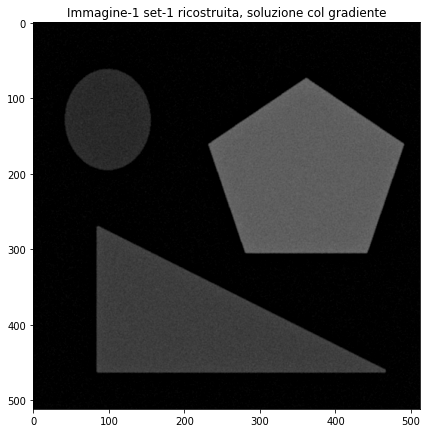

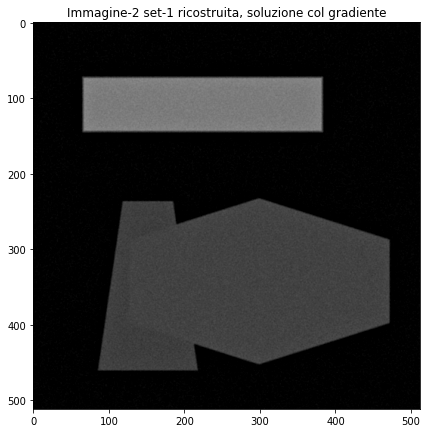

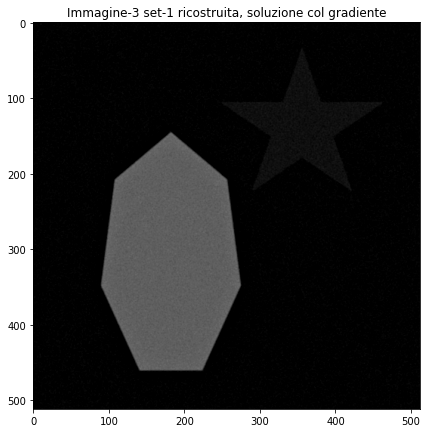

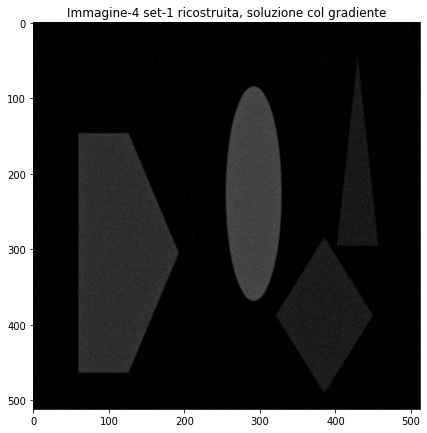

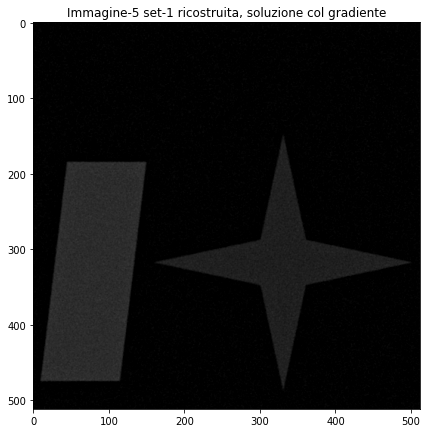

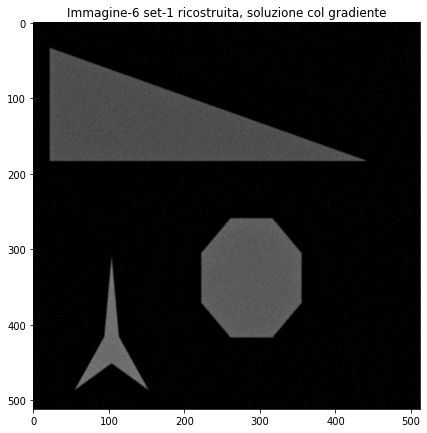

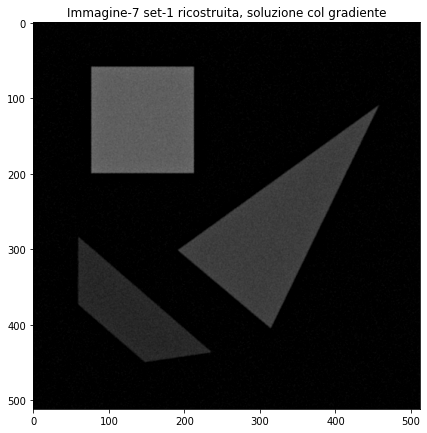

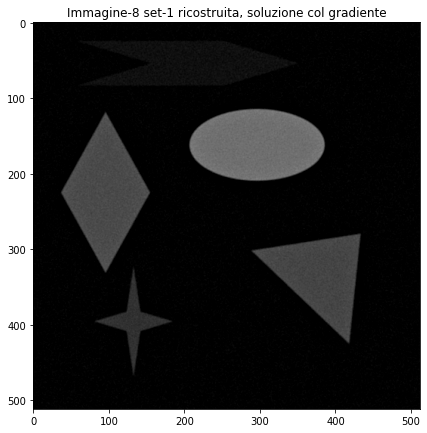

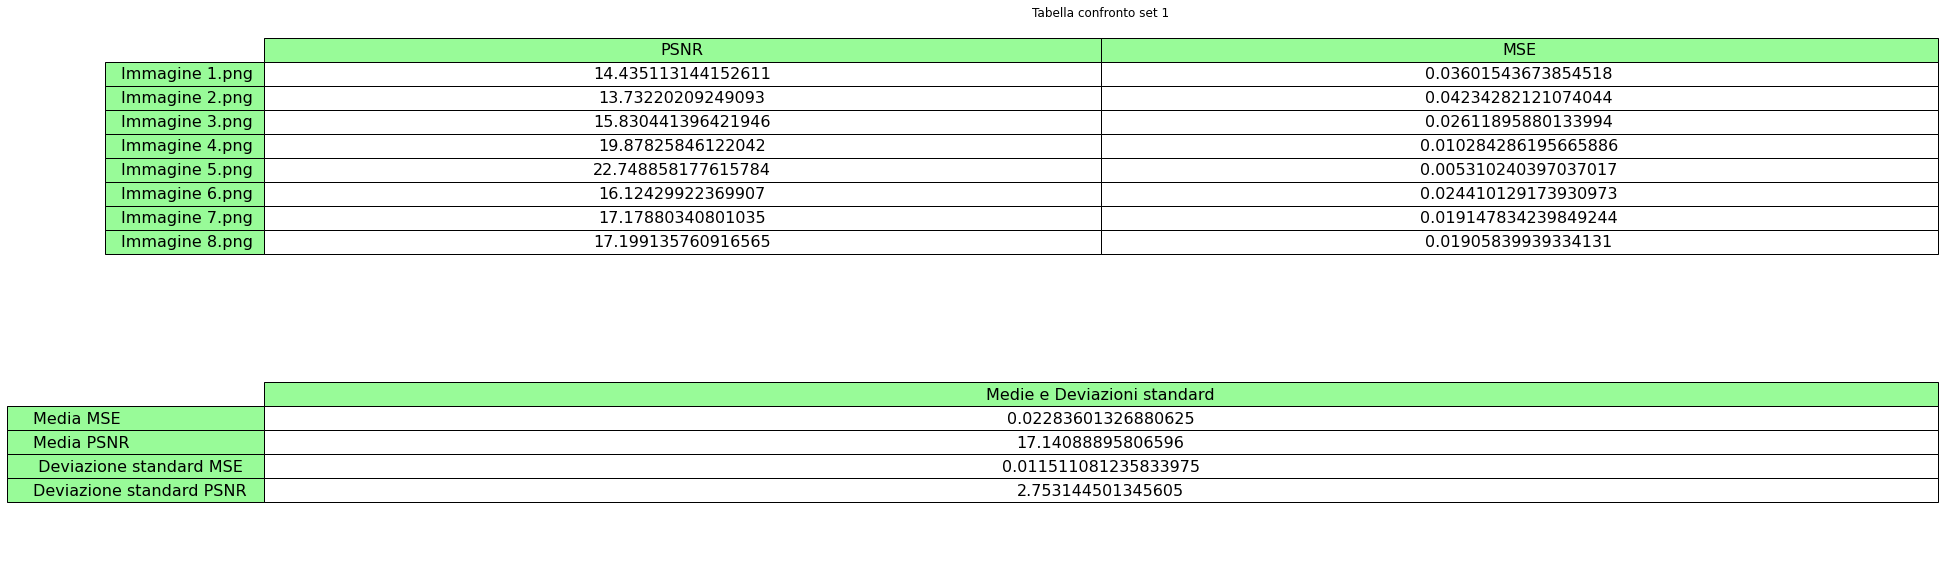

In [16]:
#metodo del gradiente coniugato
lambda_value = str(lam).replace('.', ',')

data_CG = []
data2 = []
MSE_CG = []
PSNR_CG = []
sum_MSE = 0
sum_PSNR = 0

for i in range(8):
  b=imblur1[i] #cambiare anche il filtro del blur corrispondente
  x0 = np.zeros(immagini[0].shape[0]**2)

  reg =  minimize(f, x0, method='CG', jac=grad_f, options={'disp':True, 'maxiter':30})

  print(reg)

  x = reg.x.reshape((512,512))

  PSNR_CG.append(metrics.peak_signal_noise_ratio(immagini[i], x))
  MSE_CG.append(metrics.mean_squared_error(immagini[i], x))
  print('PSNR immagine-{} con imblur{}: {}'.format(i, set_number, PSNR_CG[i]))
  print('MSE immagine-{} con imblur{}: {}'.format(i, set_number, MSE_CG[i]))
  data_CG.append([PSNR_CG[i], MSE_CG[i]])
  plt.figure(figsize=(8,8))
  ax = plt.subplot()
  ax.imshow(x, cmap='gray', vmin=0, vmax=1)
  plt.title('Immagine-' + str(i+1) + ' set-{} ricostruita, lambda={}'.format(set_number, lambda_value))
  plt.imsave('Immagine-' + str(i+1) + ' set-{} ricostruita, lambda={}.png'.format(set_number,lambda_value),x, cmap=plt.cm.gray, vmin=0, vmax=1)
  files.download('Immagine-' + str(i+1) + ' set-{} ricostruita, lambda={}.png'.format(set_number, lambda_value))

  sum_MSE = MSE_CG[i] + sum_MSE
  sum_PSNR = PSNR_CG[i] + sum_PSNR

media_MSE_CG = sum_MSE / 8
media_PSNR_CG = sum_PSNR / 8
dev_MSE_CG = np.std(MSE_CG)
dev_PSNR_CG = np.std(PSNR_CG)
data2.append([media_MSE_CG])
data2.append([media_PSNR_CG])
data2.append([dev_MSE_CG])
data2.append([dev_PSNR_CG])
headers=["PSNR", "MSE"]


fig, (ax, ax2) = plt.subplots(2,figsize=(30,10))
ax.set_axis_off()
table = ax.table(
    cellText = data_CG,
    colLabels = headers,
    rowLabels = ["Immagine 1.png", "Immagine 2.png","Immagine 3.png","Immagine 4.png","Immagine 5.png","Immagine 6.png","Immagine 7.png","Immagine 8.png"],
    rowColours =["palegreen"] * 10,  
    colColours =["palegreen"] * 10, 
    cellLoc = "center",
    loc="center")
table.scale(1,2)
ax.set_axis_off()
table.set_fontsize(16)
ax.set_title("Tabella confronto set 1")

ax2.set_axis_off()
table2 = ax2.table(
    cellText = data2,
    colLabels = ["Medie e Deviazioni standard"],
    rowLabels = ["Media MSE", "Media PSNR", " Deviazione standard MSE", "Deviazione standard PSNR"],
    rowColours =["palegreen"] * 10,  
    colColours =["palegreen"] * 10, 
    cellLoc = "center",
    loc = "center")
table2.scale(1,2)
ax2.set_axis_off()
table2.set_fontsize(16)

plt.show()


#soluzione con il metodo del gradiente
step=0.1
MAXITERATIONS=100
ABSOLUTE_STOP=1.e-5
mode='plot_history'
x0 = np.zeros(immagini[0].shape[0]**2)

data_gradient = []
data2 = []
MSE_gradiente = []
PSNR_gradiente = []
sum_MSE = 0
sum_PSNR = 0


for i in range(8):
  b = imblur1[i]
  (X, norm_grad_list, function_eval_list, error_list, k)  = grad_minimize(x0, b, step, MAXITERATIONS, ABSOLUTE_STOP)

  print(X)
  
  PSNR_gradiente.append(metrics.peak_signal_noise_ratio(immagini[i], X))
  MSE_gradiente.append(metrics.mean_squared_error(immagini[i], X))
  print('PSNR immagine-{} con imblur{}: {}'.format(i, set_number, PSNR_gradiente[i]))
  print('MSE immagine-{} con imblur{}: {}'.format(i, set_number, MSE_gradiente[i]))
  data_gradient.append([PSNR_gradiente[i], MSE_gradiente[i]])

  plt.figure(figsize=(pixel2inch(512,72),pixel2inch(512,72))) #72dpi
  ax = plt.subplot()
  ax.imshow(X, cmap='gray', vmin=0, vmax=1)
  plt.title('Immagine-' + str(i+1) + ' set-{} ricostruita, soluzione col gradiente'.format(set_number))
  plt.imsave('Immagine-' + str(i+1) + ' set-{} ricostruita, soluzione col gradiente.png'.format(set_number),X, cmap=plt.cm.gray, vmin=0, vmax=1)
  files.download('Immagine-' + str(i+1) + ' set-{} ricostruita, soluzione col gradiente.png'.format(set_number))

  sum_MSE = MSE_gradiente[i] + sum_MSE
  sum_PSNR = PSNR_gradiente[i] + sum_PSNR

media_MSE_gradiente = sum_MSE / 8
media_PSNR_gradiente = sum_PSNR / 8
dev_MSE_gradiente = np.std(MSE_gradiente)
dev_PSNR_gradiente = np.std(PSNR_gradiente)
data2.append([media_MSE_gradiente])
data2.append([media_PSNR_gradiente])
data2.append([dev_MSE_gradiente])
data2.append([dev_PSNR_gradiente])
headers=["PSNR", "MSE"]


fig, (ax, ax2) = plt.subplots(2,figsize=(30,10))
ax.set_axis_off()
table = ax.table(
    cellText = data_gradient,
    colLabels = headers,
    rowLabels = ["Immagine 1.png", "Immagine 2.png","Immagine 3.png","Immagine 4.png","Immagine 5.png","Immagine 6.png","Immagine 7.png","Immagine 8.png"],
    rowColours =["palegreen"] * 10,  
    colColours =["palegreen"] * 10, 
    cellLoc = "center",
    loc="center")
table.scale(1,2)
ax.set_axis_off()
table.set_fontsize(16)
ax.set_title("Tabella confronto set 1")

ax2.set_axis_off()
table2 = ax2.table(
    cellText = data2,
    colLabels = ["Medie e Deviazioni standard"],
    rowLabels = ["Media MSE", "Media PSNR", " Deviazione standard MSE", "Deviazione standard PSNR"],
    rowColours =["palegreen"] * 10,  
    colColours =["palegreen"] * 10, 
    cellLoc = "center",
    loc = "center")
table2.scale(1,2)
ax2.set_axis_off()
table2.set_fontsize(16)

plt.show()

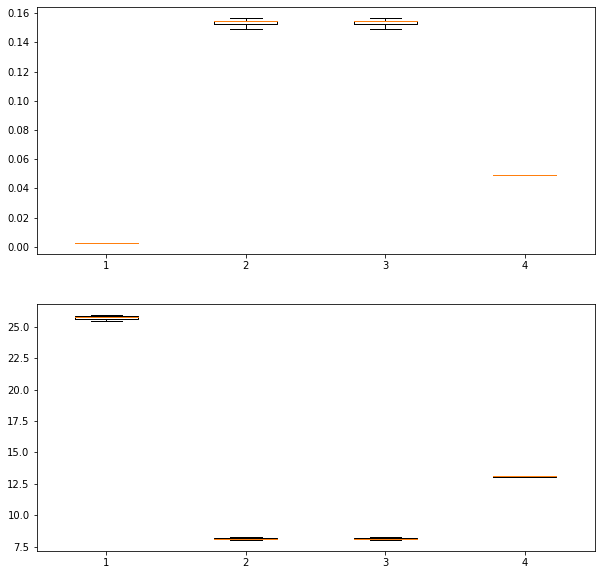

In [25]:
medie_MSE = [MSE_corrotta, MSE_naive, MSE_CG, MSE_gradiente]
medie_PSNR = [PSNR_corrotta, PSNR_naive, PSNR_CG, PSNR_gradiente]

fig, (ax1, ax2) = plt.subplots(2, figsize= (10,10))
ax1.boxplot(medie_MSE, 0, "")
ax2.boxplot(medie_PSNR, 0, "")
plt.show()

## 4) Variazione Totale (Facoltativo) 

Un altra funzione adatta come termine di regolarizzazione è la Variazione Totale. Data $u$ immagine di dimensioni $m\times n$ la variazione totale $TV$ di $u$ è definit come:
\begin{align*}
  TV(u) = \sum_i^n{\sum_j^m{\sqrt{||\nabla u(i, j)||_2^2 + \epsilon^2}}}
\end{align*}
Per calcolare il gradiente dell'immagine $\nabla u$ usiamo la funzione `np.gradient` che approssima la derivata per ogni pixel calcolando la differenza tra pixel adiacenti. I risultati sono due immagini della stessa dimensione dell'immagine in input, una che rappresenta il valore della derivata orizzontale `dx` e l'altra della derivata verticale `dy`. Il gradiente dell'immagine nel punto $(i, j)$ è quindi un vettore di due componenti, uno orizzontale contenuto in `dx` e uno verticale in `dy`.

Come nei casi precedenti il problema di minimo che si va a risolvere è il seguente:
\begin{align*}
  x^* = \arg\min_x \frac{1}{2} ||Ax - b||_2^2 + \lambda TV(u)
\end{align*}
il cui gradiente $\nabla f$ è dato da
\begin{align*}
\nabla f(x) = (A^TAx - A^Tb)  + \lambda \nabla TV(x)
\end{align*}

Utilizzando il metodo del gradiente implementato a lezione, calcolare la soluzione del precendente problema di minimo regolarizzato per differenti valori di $\lambda$. 


---
Per risolvere il problema di minimo è necessario anche calcolare il gradiente della variazione totale che è definito nel modo seguente
\begin{align*}
  \nabla TV(u) = -div\left(\frac{\nabla u}{\sqrt{||\nabla u||_2^2 + \epsilon^2}}\right)
\end{align*}

\begin{align*}
  div(F) = \frac{\partial F_x}{\partial x} + \frac{\partial F_y}{\partial y}
\end{align*}

$div(F)$ è la divergenza del campo vettoriale $F$, nel nostro caso $F$ ha due componenti dati dal gradiente dell'immagine $\nabla u$ scalato per il valore $ \frac{1}{\sqrt{||\nabla u||_2^2 + \epsilon^2}}$. Per calcolare la divergenza bisogna calcolare la derivata orizzontale $\frac{\partial F_x}{\partial x}$ della componente $x$ di $F$ e sommarla alla derivata verticale $\frac{\partial F_y}{\partial y}$ della componente $y$ di $F$. Per specificare in quale direzione calcolare la derivata con la funzione `np.gradient` utilizziamo il parametro `axis = 0` per l'orizzontale e `axis = 1` per la verticale.

In [ ]:
eps = 1e-2

# Variazione totale
def totvar(x):
  # Calcola il gradiente di x
  dx, dy = np.gradient(x)
  n2 = np.square(dx) + np.square(dy)

  # Calcola la variazione totale di x
  tv = np.sqrt(n2 + eps**2).sum()
  return tv

# Gradiente della variazione totale
def grad_totvar(x):
  # Calcola il numeratore della frazione
  dx, dy = np.gradient(x)

  # Calcola il denominatore della frazione
  n2 = np.square(dx) + np.square(dy)
  den = np.sqrt(n2 + eps**2)

  # Calcola le due componenti di F dividendo il gradiente per il denominatore
  Fx = dx / den
  Fy = dy / den

  # Calcola la derivata orizzontale di Fx 
  dFdx = np.gradient(Fx, axis=0)
  
  # Calcola la derivata verticale di Fy
  dFdy = np.gradient(Fy, axis=1)

  # Calcola la divergenza 
  div = (dFdx + dFdy)

  # Restituisci il valore del gradiente della variazione totale
  return -div

# Relazione

1.   Riportare e commentare i risultati ottenuti nei punti 2. 3. (e 4.) su un immagine del set creato e su altre due immagini in bianco e nero  (fotografiche/mediche/astronomiche)
2.   Riportare delle tabelle con le misure di PSNR e MSE ottenute al variare dei parametri (dimensione kernel, valore di sigma, la deviazione standard del rumore, il parametro di regolarizzazione). 
3. Calcolare sull’intero set di immagini medie e deviazione standard delle metriche per alcuni valori fissati dei parametri.  
4. Analizzare su 2 esecuzioni le proprietà dei metodi numerici utilizzati (gradiente coniugato e gradiente) in termini di numero di iterazioni, andamento dell’errore, della funzione obiettivo, norma del gradiente. 

